#                                    TIME SERIES ANALYSIS

# Steps:
    1 Check Time Series data is Stationary or not Using augmented Dickey-Fuller test.
    
    2 If data is not stationart then make it stationary by finding appropriate d value. 
    
    3 Plot PACF (p) and ACF (q)
    
    4 Use Grid Search to find P,D,Q,S value according to lower AIC value
    

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\air-passengers\AirPassengers.csv')

In [3]:
data.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [4]:
data.tail(10)

,Month,#Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
#1959-1960 Every Month Data

In [6]:
data.columns=['Month','Passengers' ]

In [7]:
data['Month']=pd.to_datetime(data['Month'])

In [8]:
data.set_index('Month',inplace=True)

In [9]:
data.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


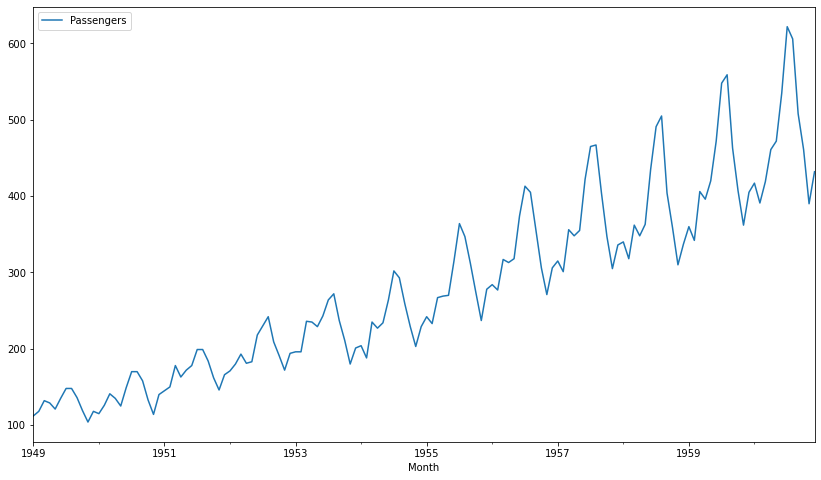

In [10]:
data.plot(figsize =(14,8))

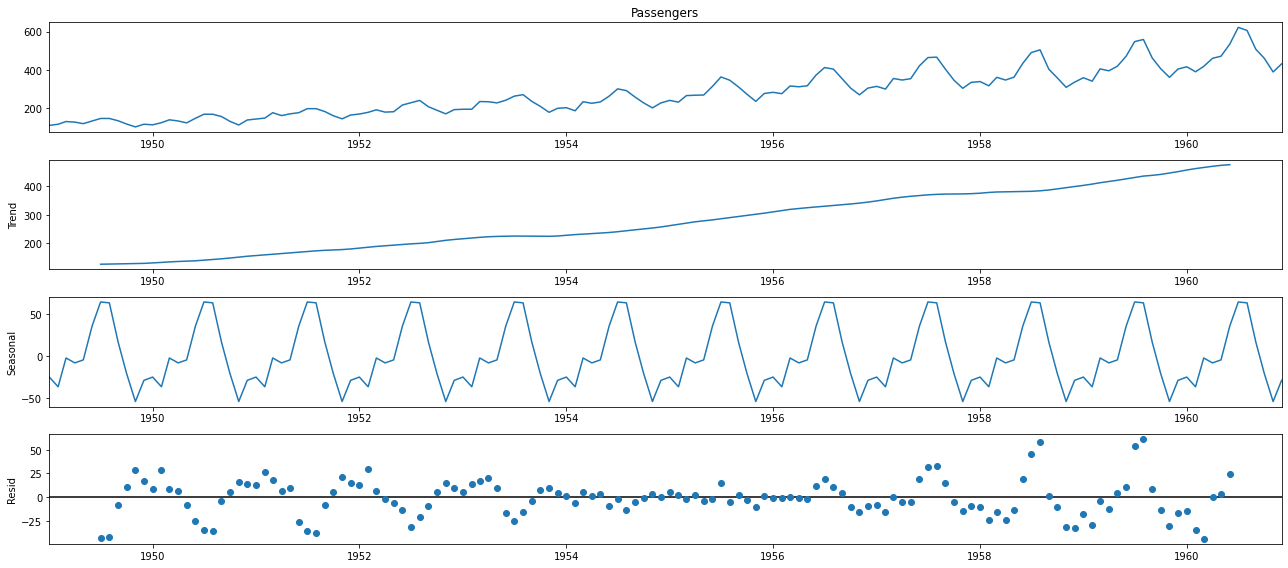

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data['Passengers'])
fig = decomposition.plot()
plt.show()


check if the series is stationary using the Augmented Dickey Fuller test

The null hypothesis of the ADF test is that the time series is non-stationary.
So, if  (p <0.05) then you reject the null hypothesis and 
infer that the time series is stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


p>0.05 then it is non-stationary

now we should find appropriate d value to deffentiate 

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize'] = 16, 12

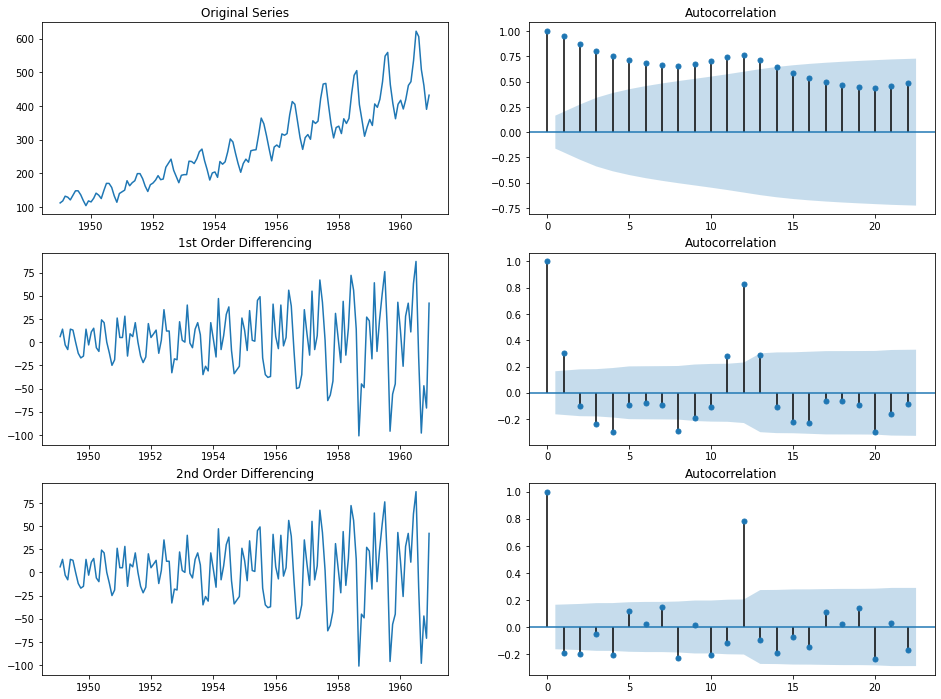

In [14]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(data); axes[0, 0].set_title('Original Series')
plot_acf(data['Passengers'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data['Passengers'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['Passengers'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data['Passengers'].diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data['Passengers'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

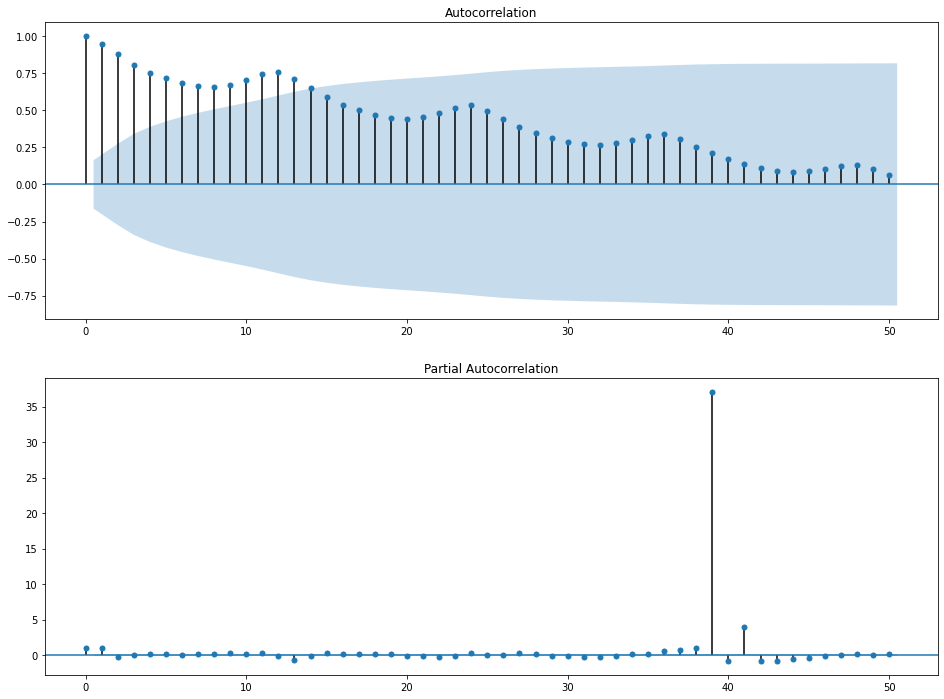

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(data['Passengers'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data['Passengers'], lags=50, ax=ax[1])
plt.show()

In [29]:
import itertools
#set parameter range
p = range(0,3)
q = range(0,3)
d = range(1,2)
s =range(12,13)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))

print(pdq)

seasonal_pdq = list(itertools.product(p, d, q, s))


print(seasonal_pdq)


[(0, 1, 0), (0, 1, 1), (0, 1, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2)]
[(0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12)]


In [30]:
#SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['Passengers'],
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{}  AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 3.574681
         Iterations: 2
         Function evaluations: 44
SARIMA(0, 1, 0),(0, 1, 0, 12)  AIC:1031.5081081667834
Optimization terminated successfully.
         Current function value: 3.565112
         Iterations: 2
         Function evaluations: 45
SARIMA(0, 1, 0),(0, 1, 1, 12)  AIC:1030.7522490093947
Optimization terminated successfully.
         Current function value: 3.563458
         Iterations: 3
         Function evaluations: 123
SARIMA(0, 1, 0),(0, 1, 2, 12)  AIC:1032.2759955076922
Optimization terminated successfully.
         Current function value: 3.563916
         Iterations: 2
         Function evaluations: 47
SARIMA(0, 1, 0),(1, 1, 0, 12)  AIC:1030.407671169839
Optimization terminated successfully.
         Current function value: 3.565256
         Iterations: 2
         Function evaluations: 67
SARIMA(0, 1, 0),(1, 1, 1, 12)  AIC:1032.7938651042423
Optimization terminated successfully.
       

Optimization terminated successfully.
         Current function value: 3.490955
         Iterations: 7
         Function evaluations: 493
SARIMA(1, 1, 1),(2, 1, 1, 12)  AIC:1017.3950075330772
Optimization terminated successfully.
         Current function value: 3.485000
         Iterations: 13
         Function evaluations: 1034
SARIMA(1, 1, 1),(2, 1, 2, 12)  AIC:1017.6800481205212
Optimization terminated successfully.
         Current function value: 3.529840
         Iterations: 2
         Function evaluations: 92
SARIMA(1, 1, 2),(0, 1, 0, 12)  AIC:1024.593907683679
Optimization terminated successfully.
         Current function value: 3.524246
         Iterations: 3
         Function evaluations: 176
SARIMA(1, 1, 2),(0, 1, 1, 12)  AIC:1024.9828534260537
Optimization terminated successfully.
         Current function value: 3.511720
         Iterations: 2
         Function evaluations: 137
SARIMA(1, 1, 2),(0, 1, 2, 12)  AIC:1023.3754162479738
Optimization terminated successfully.
  

In [31]:
model=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(1, 1, 2),seasonal_order=(2,1,1,12))
results=model.fit()

Predict previous data to check accuracy

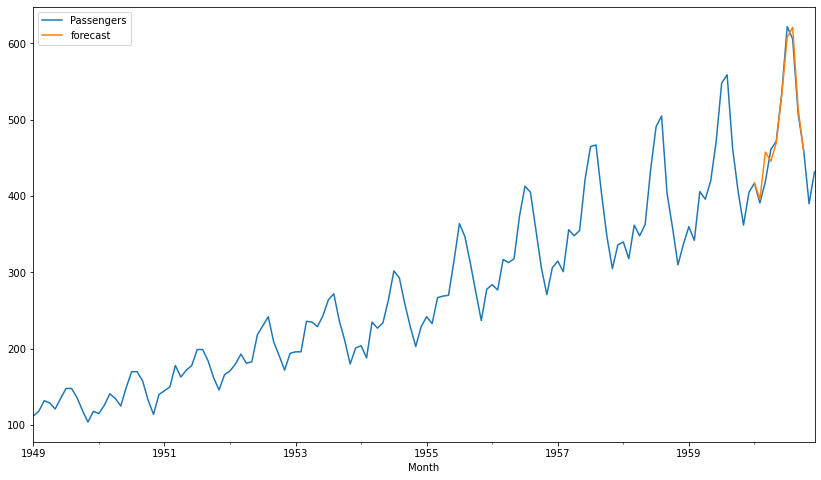

In [32]:
data['forecast']=results.predict(start='1960-01-01',end='1960-10-01',dynamic=True)
data.plot(figsize=(14,8))

In [33]:
data['forecast']

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    621.180684
1960-09-01    514.621069
1960-10-01    458.684197
1960-11-01           NaN
1960-12-01           NaN
Name: forecast, Length: 144, dtype: float64

# Now  create 24 months and them to Data

In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [35]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [36]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [37]:
future_dates_df

,Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [38]:
previous_and_future_data=pd.concat([data,future_dates_df])

In [39]:
previous_and_future_data

,Passengers,forecast
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN


# Now predict 

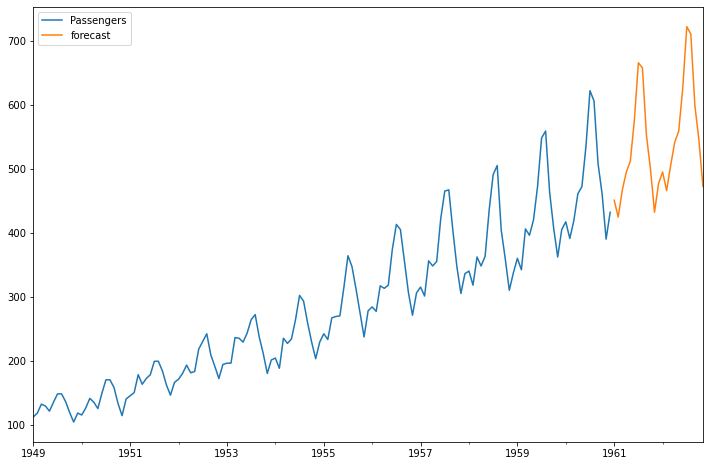

In [40]:
previous_and_future_data['forecast'] = results.predict(start = '1961-01-01', end = '1962-11-01', dynamic= True)  
previous_and_future_data.plot(figsize=(12, 8)) 

In [41]:
previous_and_future_data.tail(24)

,Passengers,forecast
1960-12-01,432,NaN
1961-01-01,NaN,450.826956
1961-02-01,NaN,424.473255
1961-03-01,NaN,466.453380
1961-04-01,NaN,494.579954
1961-05-01,NaN,512.042256
1961-06-01,NaN,575.614712
1961-07-01,NaN,665.720905
1961-08-01,NaN,657.694926
1961-09-01,NaN,552.090385
